# Examples for pyPlumbing

PyPlumbing is the new package which substitutes pySeifert. PyPlumbing offers numerous advantages with respect to pySeifert:
1. pyPlumbing is quicker than pySeifert
2. pyPlumbing is able to handle any weakly negative plumbing manifold

This note covers a few examples of pyPlumbing usage

In [1]:
load("pyPlumbing.sage")

## Definitions
Plumbings can be defined in multiple ways depending on the manifold.
The most generic is to define a Plumbing through a plumbing graph:

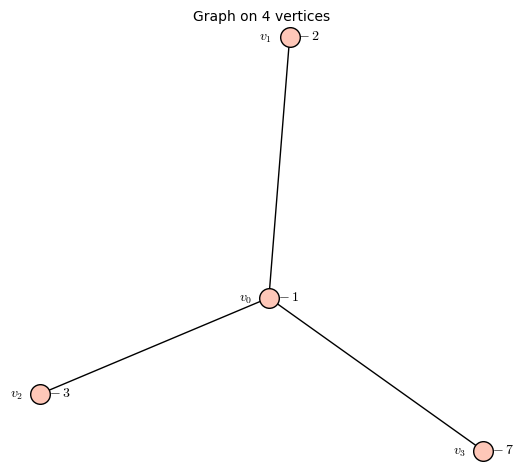

In [2]:
P = Plumbing({0: -1, 1: -2, 2: -3, 3: -7}, [(0, 1), (0, 2), (0, 3)]);P.graph

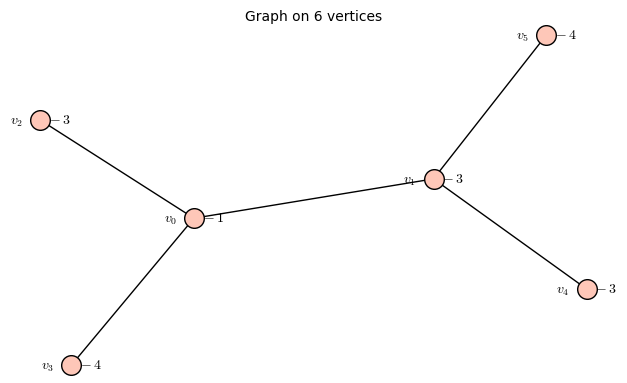

In [3]:
P2 = Plumbing({0: -1, 1: -3, 2: -3, 3: -4, 4: -3, 5: -4}, [(0,1),(0,2),(0,3),(1,4),(1,5)]); P2.graph

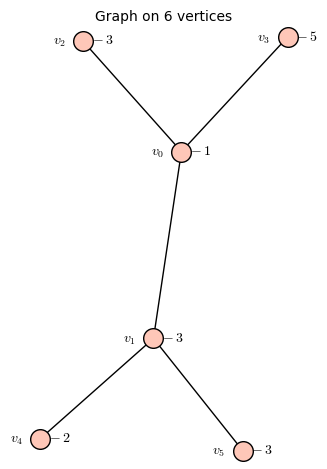

In [4]:
P3 = Plumbing({0: 1, 1:3, 2:3, 3:5, 4:2, 5:3}, [(0,1),(0,2),(0,3),(1,4),(1,5)]).invert_orientation(); P3.graph

Seifert manifolds may also be defined through their Seifert data

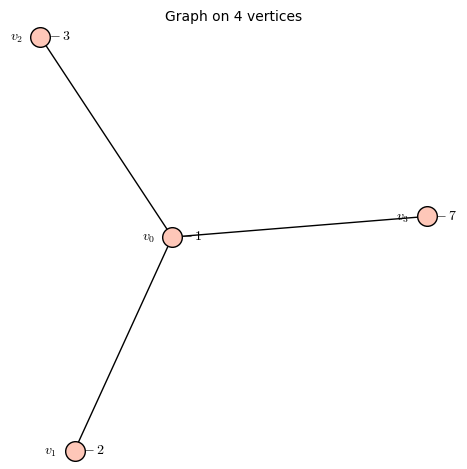

In [5]:
P = Plumbing.from_Seifert_data([-1,1/2,1/3,1/7]);P.graph

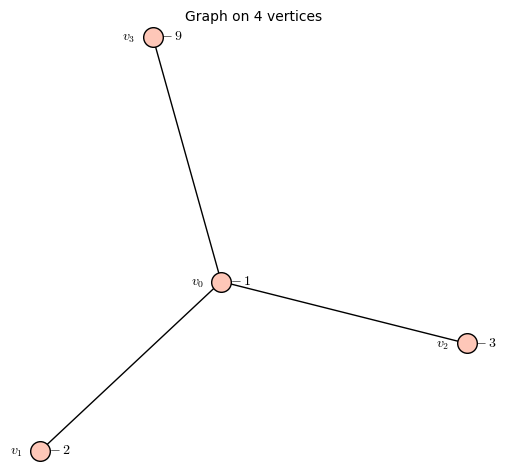

In [6]:
P4 = Plumbing.from_Seifert_data([-1,1/2,1/3,1/9]);P4.graph

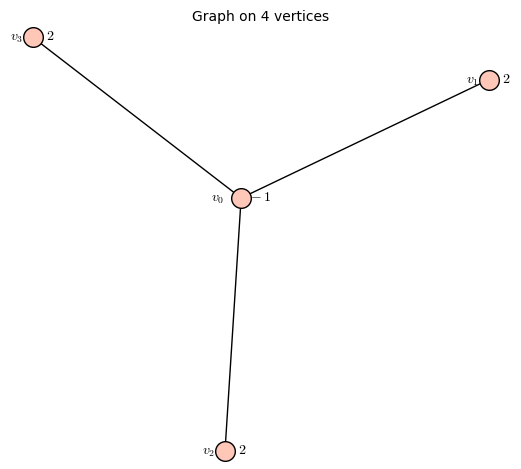

In [7]:
P5 = Plumbing.from_Seifert_data([-1,-1/2,-1/2,-1/2]);P5.graph

Spin c structures are computed in a similar way as pySeifert

In [11]:
#P.spin_c(["A",1]),P.spin_c(["A",2]),P.spin_c(["A",5]),P.spin_c(["D",5])

In [12]:
#P4.spin_c(["A",1]),P4.spin_c(["A",2]),P4.spin_c(["A",5]),P4.spin_c(["D",5])

And with these the $\hat{Z}$ can be computed (the higher the last number the more q-powers are computed. It's still unclear to what maximum q-power the expansion is correct though. The best thing to do in that case so far is to compute the next number and see where they start differing.)

There are two functions to compute zhat. Plumbing.zhat uses for loops and lists in python, zhat_vec uses numpy vectorization. The first is more tested than the second. Both are quicker than pySeifert, pySeifert is more reliable.

In [38]:
import time
st = time.time()
load("pyPlumbing.sage")
P = Plumbing.from_Seifert_data([-1,-1/2,-1/2,-1/3]);
zh = P.zhat(["A",1],P.spin_c(["A",1])[0],1000,n_powers_start = 50, method = "cython", info = False) 
end = time.time()
print(end-st)
print(zh)

2.2701315879821777
q^(1/4)(4 - 4q^(14) + 4q^(28) - 4q^(70) + 4q^(98) - 4q^(168) + 4q^(210) - 4q^(308) + 4q^(364) - 4q^(490) + O(q^560))


In [16]:
list(list(l) for l in P.plumbing_matrix.rows())

[[-1, 1, 1, 1], [1, 2, 0, 0], [1, 0, 2, 0], [1, 0, 0, 3]]

In [24]:
import time
st = time.time()
zh = P5.zhat(["A",2],P5.spin_c(["A",2])[0],1000,n_powers_start = 3,div_factor=1000000, method = "cython", info = True) 
end = time.time()
print(end-st)
print(zh)

Computing 3
Maximum power computed 6
zhat_A: q^(2)(-192 - 120q^(5) + O(q^6))
zhat_B: q^(7)(-216 + 216q^(10) + O(q^11))
Computing 4
Maximum power computed 16
zhat_A: q^(2)(-264 - 336q^(5) + 216q^(15) + 36q^(20) + O(q^21))
zhat_B: q^(17)(-840 + O(q^1))
Computing 5
Maximum power computed 16
zhat_A: q^(2)(240 + 1080q^(5) - 480q^(15) + 960q^(20) + O(q^21))
zhat_B: q^(17)(240 + 480q^(15) - 24q^(30) + O(q^31))
Computing 6
Maximum power computed 46
zhat_A: q^(2)(240 + 240q^(5) - 3696q^(15) - 10440q^(20) + 1680q^(30) - 24q^(45) + 120q^(50) + 12q^(60) + O(q^61))
zhat_B: q^(47)(-2952 + O(q^1))
Computing 7


KeyboardInterrupt: 

In [26]:
import time
st = time.time()
zh = P.zhat(["A",1],P.spin_c(["A",1])[0],1000,n_powers_start = 50, method = "python", info = False) 
end = time.time()
print(end-st)
print(zh)

2.6958131790161133
q^(1/2)(-4 + 4q^(1) + 4q^(5) - 4q^(10) + 4q^(11) - 4q^(18) - 4q^(30) + 4q^(41) - 4q^(43) + 4q^(56) + O(q^76))


In [52]:
import time
st = time.time()
zh = P.zhat(["A",1],P.spin_c(["A",1])[0],1000,n_powers_start=50, method = "vectorized") 
end = time.time()
print(end-st)
print(zh)

2.436365842819214
q^(1/2)(-4 + 4q^(1) + 4q^(5) - 4q^(10) + 4q^(11) - 4q^(18) - 4q^(30) + 4q^(41) - 4q^(43) + 4q^(56) + O(q^76))


In [53]:
import time
st = time.time()
zh = P.zhat(["A",1],P.spin_c(["A",1])[0],1000, n_powers_start = 50, method = "cython") 
end = time.time()
print(end-st)
print(zh)

2.4251832962036133
q^(1/2)(-4 + 4q^(1) + 4q^(5) - 4q^(10) + 4q^(11) - 4q^(18) - 4q^(30) + 4q^(41) - 4q^(43) + 4q^(56) + O(q^76))


In [248]:
import time
st = time.time()
zh = P2.zhat(["A",1],P2.spin_c(["A",1])[0],100,n_powers_start = 16, method = "python") 
end = time.time()
print(end-st)
print(zh)

40.56353235244751
q^(1/2)(8 + 8q^(1) - 8q^(2) - 8q^(4) - 16q^(5) + 8q^(6) - 8q^(7) - 8q^(8) + 8q^(10) + 8q^(11) + O(q^12))


In [249]:
import time
st = time.time()
zh = P2.zhat(["A",1],P2.spin_c(["A",1])[0],100,n_powers_start = 16, method = "vectorized") 
end = time.time()
print(end-st)
print(zh)

7.499528646469116
q^(1/2)(8 + 8q^(1) - 8q^(2) - 8q^(4) - 16q^(5) + 8q^(6) - 8q^(7) - 8q^(8) + 8q^(10) + 8q^(11) + O(q^12))


In [250]:
import time
st = time.time()
zh = P2.zhat(["A",1],P2.spin_c(["A",1])[0],100,n_powers_start = 16, method = "cython") 
end = time.time()
print(end-st)
print(zh)

6.361391305923462
q^(1/2)(8 + 8q^(1) - 8q^(2) - 8q^(4) - 16q^(5) + 8q^(6) - 8q^(7) - 8q^(8) + 8q^(10) + 8q^(11) + O(q^12))


In [251]:
import time
st = time.time()
zh = P3.zhat(["A",1],P3.spin_c(["A",1])[0],100,n_powers_start = 16, method = "python") 
end = time.time()
print(end-st)
print(zh)

41.19664430618286
q^(1/2)(12 + 12q^(1) - 4q^(2) + 8q^(3) + 4q^(4) - 8q^(6) - 16q^(7) + 8q^(8) - 8q^(9) - 8q^(10) + O(q^11))


In [252]:
import time
st = time.time()
zh = P3.zhat(["A",1],P3.spin_c(["A",1])[0],100,n_powers_start = 16, method = "vectorized") 
end = time.time()
print(end-st)
print(zh)

6.361327171325684
q^(1/2)(12 + 12q^(1) - 4q^(2) + 8q^(3) + 4q^(4) - 8q^(6) - 16q^(7) + 8q^(8) - 8q^(9) - 8q^(10) + O(q^11))


In [253]:
import time
st = time.time()
zh = P3.zhat(["A",1],P3.spin_c(["A",1])[0],100,n_powers_start = 16, method = "cython") 
end = time.time()
print(end-st)
print(zh)

8.28788685798645
q^(1/2)(12 + 12q^(1) - 4q^(2) + 8q^(3) + 4q^(4) - 8q^(6) - 16q^(7) + 8q^(8) - 8q^(9) - 8q^(10) + O(q^11))


All functions work for non-brieskorn spheres

In [254]:
import time
st = time.time()
zh = P4.zhat(["A",1],P4.spin_c(["A",1])[0],10000,n_powers_start = 16, method = "python") 
end = time.time()
print(end-st)
print(zh)

4.807405471801758
q^(1)(-4 - 4q^(4) + 4q^(5) + 4q^(17) - 4q^(19) - 4q^(39) + 4q^(42) + 4q^(70) - 4q^(74) - 4q^(110) + O(q^115))


In [255]:
import time
st = time.time()
zh = P4.zhat(["A",1],P4.spin_c(["A",1])[0],10000,n_powers_start = 16, method = "vectorized") 
end = time.time()
print(end-st)
print(zh)

4.528010845184326
q^(1)(-4 - 4q^(4) + 4q^(5) + 4q^(17) - 4q^(19) - 4q^(39) + 4q^(42) + 4q^(70) - 4q^(74) - 4q^(110) + O(q^115))


In [262]:
import time
for spin_c in P4.spin_c(["A",1]):
    print(spin_c.T)
    st = time.time()
    zh = P4.zhat(["A",1],spin_c,10000,n_powers_start = 16, method = "cython") 
    end = time.time()
    print(end-st)
    print(zh)

[ 1 -1 -1 -1]
4.578124284744263
q^(1)(-4 - 4q^(4) + 4q^(5) + 4q^(17) - 4q^(19) - 4q^(39) + 4q^(42) + 4q^(70) - 4q^(74) - 4q^(110) + O(q^115))
[ 3 -1 -5 -7]
5.626598596572876
q^(26667/20000)(2 + 2q^(2) - 2q^(7) - 2q^(13) + 2q^(23) + 2q^(33) - 2q^(48) - 2q^(62) + 2q^(82) + 2q^(100) + O(q^125))


In [16]:
import time
st = time.time()
zh = P5.zhat(["A",1],P5.spin_c(["A",1])[0],1000,n_powers_start = 50, method = "python") 
end = time.time()
print(end-st)
print(zh)

2.38722562789917
q^(1/2)(16 - 16q^(5) + 16q^(15) - 16q^(30) + 16q^(50) - 16q^(75) + 16q^(105) - 16q^(140) + 16q^(180) - 16q^(225) + O(q^275))


In [8]:
import time
st = time.time()
zh = P5.zhat(["A",1],P5.spin_c(["A",1])[0],1000,n_powers_start = 50, method = "vectorized") 
end = time.time()
print(end-st)
print(zh)

2.4804511070251465
q^(1/2)(16 - 16q^(5) + 16q^(15) - 16q^(30) + 16q^(50) - 16q^(75) + 16q^(105) - 16q^(140) + 16q^(180) - 16q^(225) + O(q^275))


In [17]:
import time
for spin_c in P5.spin_c(["A",1]):
    print(spin_c.T)
    st = time.time()
    zh = P5.zhat(["A",1],spin_c,1000,n_powers_start = 50, method = "cython") 
    print(len(zh.numerical))
    end = time.time()
    print(end-st)
    print(zh)

[ 1 -1 -1 -1]
20
2.186535120010376
q^(1/2)(16 - 16q^(5) + 16q^(15) - 16q^(30) + 16q^(50) - 16q^(75) + 16q^(105) - 16q^(140) + 16q^(180) - 16q^(225) + O(q^275))
[1 1 1 1]
41
4.586271286010742
q^(-1/10)(4 + 8q^(2) - 8q^(3) - 8q^(9) + 8q^(11) + 8q^(21) - 8q^(24) - 8q^(38) + 8q^(42) + 8q^(60) + O(q^65))
[ 3 -1  1  1]
20
2.2187016010284424
q^(1/2)(16 - 16q^(5) + 16q^(15) - 16q^(30) + 16q^(50) - 16q^(75) + 16q^(105) - 16q^(140) + 16q^(180) - 16q^(225) + O(q^275))
[ 3  1 -1  1]
20
2.1964123249053955
q^(1/2)(16 - 16q^(5) + 16q^(15) - 16q^(30) + 16q^(50) - 16q^(75) + 16q^(105) - 16q^(140) + 16q^(180) - 16q^(225) + O(q^275))
[ 3  1  1 -1]
20
2.2449045181274414
q^(1/2)(16 - 16q^(5) + 16q^(15) - 16q^(30) + 16q^(50) - 16q^(75) + 16q^(105) - 16q^(140) + 16q^(180) - 16q^(225) + O(q^275))
[3 1 1 1]
40
3.189155340194702
q^(1/10)(-8 - 8q^(1) + 8q^(4) + 8q^(7) - 8q^(13) - 8q^(18) + 8q^(27) + 8q^(34) - 8q^(46) - 8q^(55) + O(q^70))
[3 1 3 3]
41
6.430308818817139
q^(-1/10)(4 + 8q^(2) - 8q^(3) - 8q^(9) + 8q^

With Plumbing.zhat_vec we can also compute zhat at higher rank with multiple nodes. Albeit the rank is never greater than 2 otherwise (my computer) crashes for lack of RAM

In [58]:
import time
st = time.time()
zh = P2.zhat(["A",2],P2.spin_c(["A",2])[0],3,n_powers_start = 1, method = "cython") 
end = time.time()
print(end-st)
print(zh)

In [368]:
load("pyPlumbing.sage")
P5 = Plumbing.from_Seifert_data([-1,-1/2,-1/2,-1/2]);P5.graph
P = P5
type_rank = ["A",1]
WG = [g.T for g in weyl_group(type_rank)]
WL = weyl_lengths(type_rank)
n_powers = 3
L_norm = L_norm_cython
zh_l = list()
for spin_c in P.spin_c(type_rank):
    exponent_products, prefactor_products = P._ell_setup(type_rank, n_powers)

    non_int_part, _ = np.modf(np.round(np.array(P.plumbing_matrix_inverse) @ (exponent_products - np.array([np.dot(g, spin_c.T).T for g in WG])[:,np.newaxis] ), 5))
    condition = np.logical_and.reduce(np.concatenate(np.abs(non_int_part)) <= 1e-5,(1,2))

    exponent_contributing = np.tile(exponent_products, (len(WG),1,1))
    #Multiply each number in prefactor_products by each WL and concatenate the result
    

    prefactor_products = np.concatenate(np.array(WL)[:,np.newaxis,np.newaxis]*prefactor_products[np.newaxis,:])
    prefactor_contributing = prefactor_products[condition]

    # Compute L_norms and prefactors
    dec_approx = len(str(np.max(np.abs(P.plumbing_matrix_inverse))))
    C_inv = np.array(cartan_matrix(type_rank).inverse(),dtype=np.float64)
    L_norms = L_norm(np.array(P.plumbing_matrix_inverse,dtype=np.float64),C_inv,exponent_contributing,dec_approx)
    #prefactor_contributing = np.prod(prefactor_contributing,axis=1)

    # Convert to higher precision result if necessary
    q_powers = [QQ(-1/2*t) for t in L_norms]
    series_numerical = [[tuple(p),product(c)] for p,c in zip(q_powers,prefactor_contributing)]
    zh = Series(series_numerical,variables=[var("q")])*P._zhat_prefactor(type_rank)
    zh_l.append(zh)

In [369]:
non_int_part, _ = np.modf(np.round(np.array(P.plumbing_matrix_inverse) @ (exponent_products - np.array([np.dot(g, spin_c.T).T for g in WG])[:,np.newaxis] ), 5))
non_int_part = np.concatenate(np.abs(non_int_part))
condition = non_int_part < 1e-5
condition = np.all(condition,(1,2))

'\nnon_int_part = np.concatenate(np.abs(non_int_part))\ncondition = non_int_part < 1e-5\ncondition = np.all(condition,(1,2))\n'

In [412]:
exponent_products

array([[[-5.],
        [ 1.],
        [ 1.],
        [ 1.]],

       [[-5.],
        [ 1.],
        [ 1.],
        [-1.]],

       [[-5.],
        [ 1.],
        [-1.],
        [ 1.]],

       [[-5.],
        [ 1.],
        [-1.],
        [-1.]],

       [[-5.],
        [-1.],
        [ 1.],
        [ 1.]],

       [[-5.],
        [-1.],
        [ 1.],
        [-1.]],

       [[-5.],
        [-1.],
        [-1.],
        [ 1.]],

       [[-5.],
        [-1.],
        [-1.],
        [-1.]],

       [[-3.],
        [ 1.],
        [ 1.],
        [ 1.]],

       [[-3.],
        [ 1.],
        [ 1.],
        [-1.]],

       [[-3.],
        [ 1.],
        [-1.],
        [ 1.]],

       [[-3.],
        [ 1.],
        [-1.],
        [-1.]],

       [[-3.],
        [-1.],
        [ 1.],
        [ 1.]],

       [[-3.],
        [-1.],
        [ 1.],
        [-1.]],

       [[-3.],
        [-1.],
        [-1.],
        [ 1.]],

       [[-3.],
        [-1.],
        [-1.],
        [-1.]],

       [

In [415]:
A = np.tile(exponent_products,(2,1,1))

In [417]:
A[48]

array([[-5.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [386]:
np.logical_and.reduce(np.concatenate(np.abs(non_int_part)) <= 1e-5,(1,2))

array([False, False, False, False, False, False, False,  True, False,
        True,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False, False, False])

In [361]:
zh_l

[q^(2)(-192 - 120q^(5) + O(q^6)),
 q^(2/5)(12 - 36q^(1) + 56q^(3) + 24q^(4) + 44q^(7) + 8q^(12) - 4q^(13) + 2q^(16) + O(q^17)),
 q^(2)(-96 - 16q^(5) + O(q^6)),
 q^(2)(-96 - 16q^(5) + O(q^6)),
 q^(2)(-96 - 16q^(5) + O(q^6)),
 q^(8/5)(48 + 12q^(1) + 20q^(4) - 12q^(6) - 36q^(7) + 20q^(9) - 2q^(10) + O(q^11)),
 q^(7/5)(-12 + 20q^(2) - 44q^(3) - 12q^(9) + O(q^10)),
 q^(7/5)(-12 + 20q^(2) - 44q^(3) - 12q^(9) + O(q^10)),
 q^(7/5)(-12 + 20q^(2) - 44q^(3) - 12q^(9) + O(q^10)),
 q^(8/5)(48 + 16q^(1) + 20q^(4) + 20q^(7) + O(q^8)),
 q^(8/5)(48 + 16q^(1) + 20q^(4) + 20q^(7) + O(q^8)),
 q^(8/5)(48 + 16q^(1) + 20q^(4) + 20q^(7) + O(q^8))]

In [363]:
load("pyPlumbing.sage")
S = Seifert([-1,-1,2,-1,2,-1,2])
zhS_l = list()
for b in S.boundary_conditions(["A",2],basis="weight"):
    print(b)
    zhS = S.z_hat(["A",2],b,20,basis="weight")
    zhS_l.append(zhS)

[(-1, -1), (1, 1), (1, 1), (1, 1)]
[(-1, -1), (3, 0), (3, 0), (3, 0)]
[(1, -2), (1, 1), (3, 0), (3, 0)]
[(1, -2), (3, 0), (1, 1), (3, 0)]
[(1, -2), (3, 0), (3, 0), (1, 1)]
[(1, -2), (3, 0), (3, 0), (3, 0)]
[(1, -2), (3, 0), (5, -1), (5, -1)]
[(1, -2), (5, -1), (3, 0), (5, -1)]
[(1, -2), (5, -1), (5, -1), (3, 0)]
[(3, -3), (3, 0), (5, -1), (5, -1)]
[(3, -3), (5, -1), (3, 0), (5, -1)]
[(3, -3), (5, -1), (5, -1), (3, 0)]
